In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/sample_submission_sxfcbdx.csv
/kaggle/input/hr-analytics/test_KaymcHn.csv
/kaggle/input/hr-analytics/train_jqd04QH.csv


# Import Packages

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Import data

In [4]:
train = pd.read_csv("/kaggle/input/hr-analytics/train_jqd04QH.csv")
test = pd.read_csv("/kaggle/input/hr-analytics/test_KaymcHn.csv")
submission_sample = pd.read_csv("/kaggle/input/hr-analytics/sample_submission_sxfcbdx.csv")

# Check Data
* Examining the structure, quality of the dats set to gain insights of its characteristics.
* Helps to find out any issues, outliers, inconsistencies, and missing values that might affect analysis.

# Why to check Data
* Ensures data quality and integrity before analysis and modeling.
* Identify potential erros, outliers, and missing values.
* Helps in understanding the distribution of data.
* Informs decisions on data preprocessing,feature engineering and model selction.

In [5]:
print('First few rows of train data')
train.head()

First few rows of train data


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [7]:
print("Descriptive statistics of numerical columns")
train.describe()

Descriptive statistics of numerical columns


,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
print("Missing Values In each columns If any")
train.isnull().sum()

Missing Values In each columns If any


enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

# Check The Target

In [9]:
class_counts = train['target'].value_counts()
class_ratio = class_counts / len(train)

In [10]:
print("Class imbalance in the target column")
class_counts

Class imbalance in the target column


target
0    15934
1     2425
Name: count, dtype: int64

In [11]:
print("Class Ratio")
class_ratio

Class Ratio


target
0    0.867912
1    0.132088
Name: count, dtype: float64

<Axes: xlabel='target'>

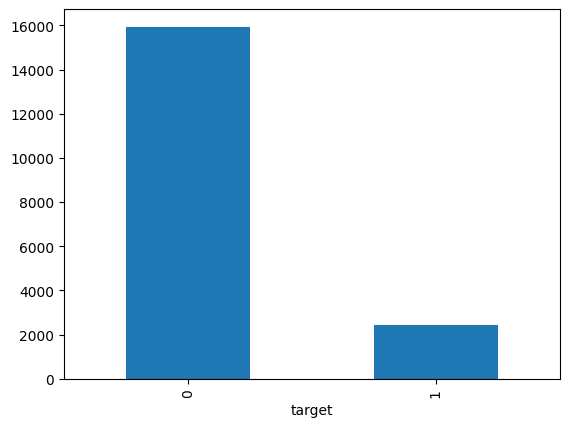

In [12]:
train['target'].value_counts().plot.bar()

# Partiton Data

In [13]:
y = train['target']
X = train.drop(['enrollee_id','target'], axis = 1)

# partitin test data into X_test
X_test = test.drop(['enrollee_id'], axis = 1)

# Split the train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= .2, random_state = 42)

In [14]:
# Display shape and sizes of data sets created
print("Shape of split dataset")
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("y_train:",y_train.shape)
print("y_val:",y_val.shape)
print("X_test:",X_test.shape)

Shape of split dataset
X_train: (14687, 12)
X_val: (3672, 12)
y_train: (14687,)
y_val: (3672,)
X_test: (15021, 12)


In [20]:
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical Columns")
print(numerical_features)

Numerical Columns
['city_development_index', 'training_hours']


In [21]:
categorical_feature = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns")
print(categorical_feature)

Categorical Columns
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


# Preprocessing

## Missing Value Treatment

In [22]:
from sklearn.impute import SimpleImputer

## Numerical Features

In [23]:
num_imputer = SimpleImputer(strategy = "median")


In [24]:
num_imputer.fit(X_train[numerical_features])

SimpleImputer(strategy='median')

In [25]:
X_train[numerical_features] = num_imputer.transform(X_train[numerical_features])
X_val[numerical_features] = num_imputer.transform(X_val[numerical_features])
X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])

In [26]:
# Display Shape of transformed data
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("X_test:",X_test.shape)

X_train: (14687, 12)
X_val: (3672, 12)
X_test: (15021, 12)


## Categorical Features

In [27]:
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
cat_imputer.fit(X_train[categorical_feature])


SimpleImputer(fill_value='missing', strategy='constant')

In [29]:
X_train[categorical_feature] = cat_imputer.transform(X_train[categorical_feature])
X_val[categorical_feature] = cat_imputer.transform(X_val[categorical_feature])
X_test[categorical_feature] = cat_imputer.transform(X_test[categorical_feature])

In [30]:
# Display Shape of transformed data
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("X_test:",X_test.shape)

X_train: (14687, 12)
X_val: (3672, 12)
X_test: (15021, 12)


# Ordinal Encoding

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
cat_encoder = OrdinalEncoder()

In [34]:
## fit the data
cat_encoder.fit(X_train[categorical_feature])

OrdinalEncoder()

In [35]:
X_train[categorical_feature] = cat_encoder.transform(X_train[categorical_feature])
X_val[categorical_feature] = cat_encoder.transform(X_val[categorical_feature])
X_test[categorical_feature] = cat_encoder.transform(X_test[categorical_feature])

In [36]:
# Display Shape of transformed data
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("X_test:",X_test.shape)

X_train: (14687, 12)
X_val: (3672, 12)
X_test: (15021, 12)


# Model Building

In [37]:
logreg_model = LogisticRegression()

In [38]:
logreg_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Predictions on X_train and X_val
y_train_pred = logreg_model.predict(X_train)
y_val_pred = logreg_model.predict(X_val)

y_test_pred = logreg_model.predict(X_test)

In [40]:
# Classification report for X_train and X_val

train_classification_report = classification_report(y_train, y_train_pred)
val_classification_report = classification_report(y_val, y_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

In [43]:
print("Classification report for X_train:")
print(train_classification_report)

Classification report for X_train:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     12762
           1       0.00      0.00      0.00      1925

    accuracy                           0.87     14687
   macro avg       0.43      0.50      0.46     14687
weighted avg       0.76      0.87      0.81     14687



In [44]:
print("Classification report for X_val:")
print(val_classification_report)

Classification report for X_val:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3172
           1       0.00      0.00      0.00       500

    accuracy                           0.86      3672
   macro avg       0.43      0.50      0.46      3672
weighted avg       0.75      0.86      0.80      3672



## Submission

In [48]:
import os

submission = pd.DataFrame({'enrollee_id': test['enrollee_id'], "target": y_test_pred})

In [51]:
submission.to_csv('/kaggle/working/submission.csv', index=False)